In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from warnings import simplefilter
from sklearn.preprocessing import MaxAbsScaler,LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
import os
from mplsoccer import Pitch, VerticalPitch, PyPizza, add_image, FontManager
from PIL import Image
import bar_chart_race as bcr
import ffmpeg

In [2]:
%matplotlib inline
pd.options.plotting.backend
pd.set_option('max_colwidth', 600)
sns.set()
simplefilter('ignore')

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", 
    autolayout=True, 
    figsize=(15, 5),
    frameon = True,
    edgecolor = 'black',
    titlesize = 20,
    titleweight = 'bold')
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=18,
    titlepad=12)
plt.rc(
    "legend",
    edgecolor = 'black',
    facecolor = 'white',
    fancybox  = True,
    fontsize  = 14,
    framealpha = 0.75,
    frameon = True,
    shadow = True,
    title_fontsize = 14)
plt.rc(
    "font",
    family = 'DejaVu Sans',
    weight = 'bold')

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

%config InlineBackend.figure_format = 'retina'

In [4]:
for root, dirs, files in os.walk('/kaggle/input'):
    for filename in files:
        print(os.path.join(root, filename))

In [5]:
file1=pd.read_csv("all_players_stats.csv")
file2=pd.read_csv("all_match_results.csv")
file3=pd.read_csv("points_table.csv")

In [6]:
file3.columns.tolist()

['Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']

In [7]:
cl=['Mancester City','Liverpool','Chelsea','Tottenham Hotspur']
el=['Arsenal']
relegate = ['Burnley','Watford','Norwich City']
cl_style = 'color:white; background-color:darkgreen;text-shadow: 3px 3px 3px black;'
tott_style = 'color:white;background-color:darkorange;text-shadow: 3px 3px 3px black;'
el_style = 'color:white;background-color:darkblue;text-shadow: 3px 3px 3px black;'
rel_style = 'color:white;background-color:darkred;text-shadow: 3px 3px 3px black;'
t1=file3.style.\
applymap(lambda v:  cl_style if v in cl  else None)\
.applymap(lambda v: tott_style  if v in ['Manchester United', 'West Ham United']  else None)\
.applymap(lambda v: el_style  if v in el  else None)\
.applymap(lambda v: rel_style  if v in relegate  else None)
t1.set_caption('⚽ EPL Table Season 2021-2022 ⚽')



In [8]:
pd.DataFrame(columns=['promoted team'],data=['Fulham', 'Bournemouth', 'Nottingham Forest']).style\
.set_caption('⭐EPL Season 22-23')

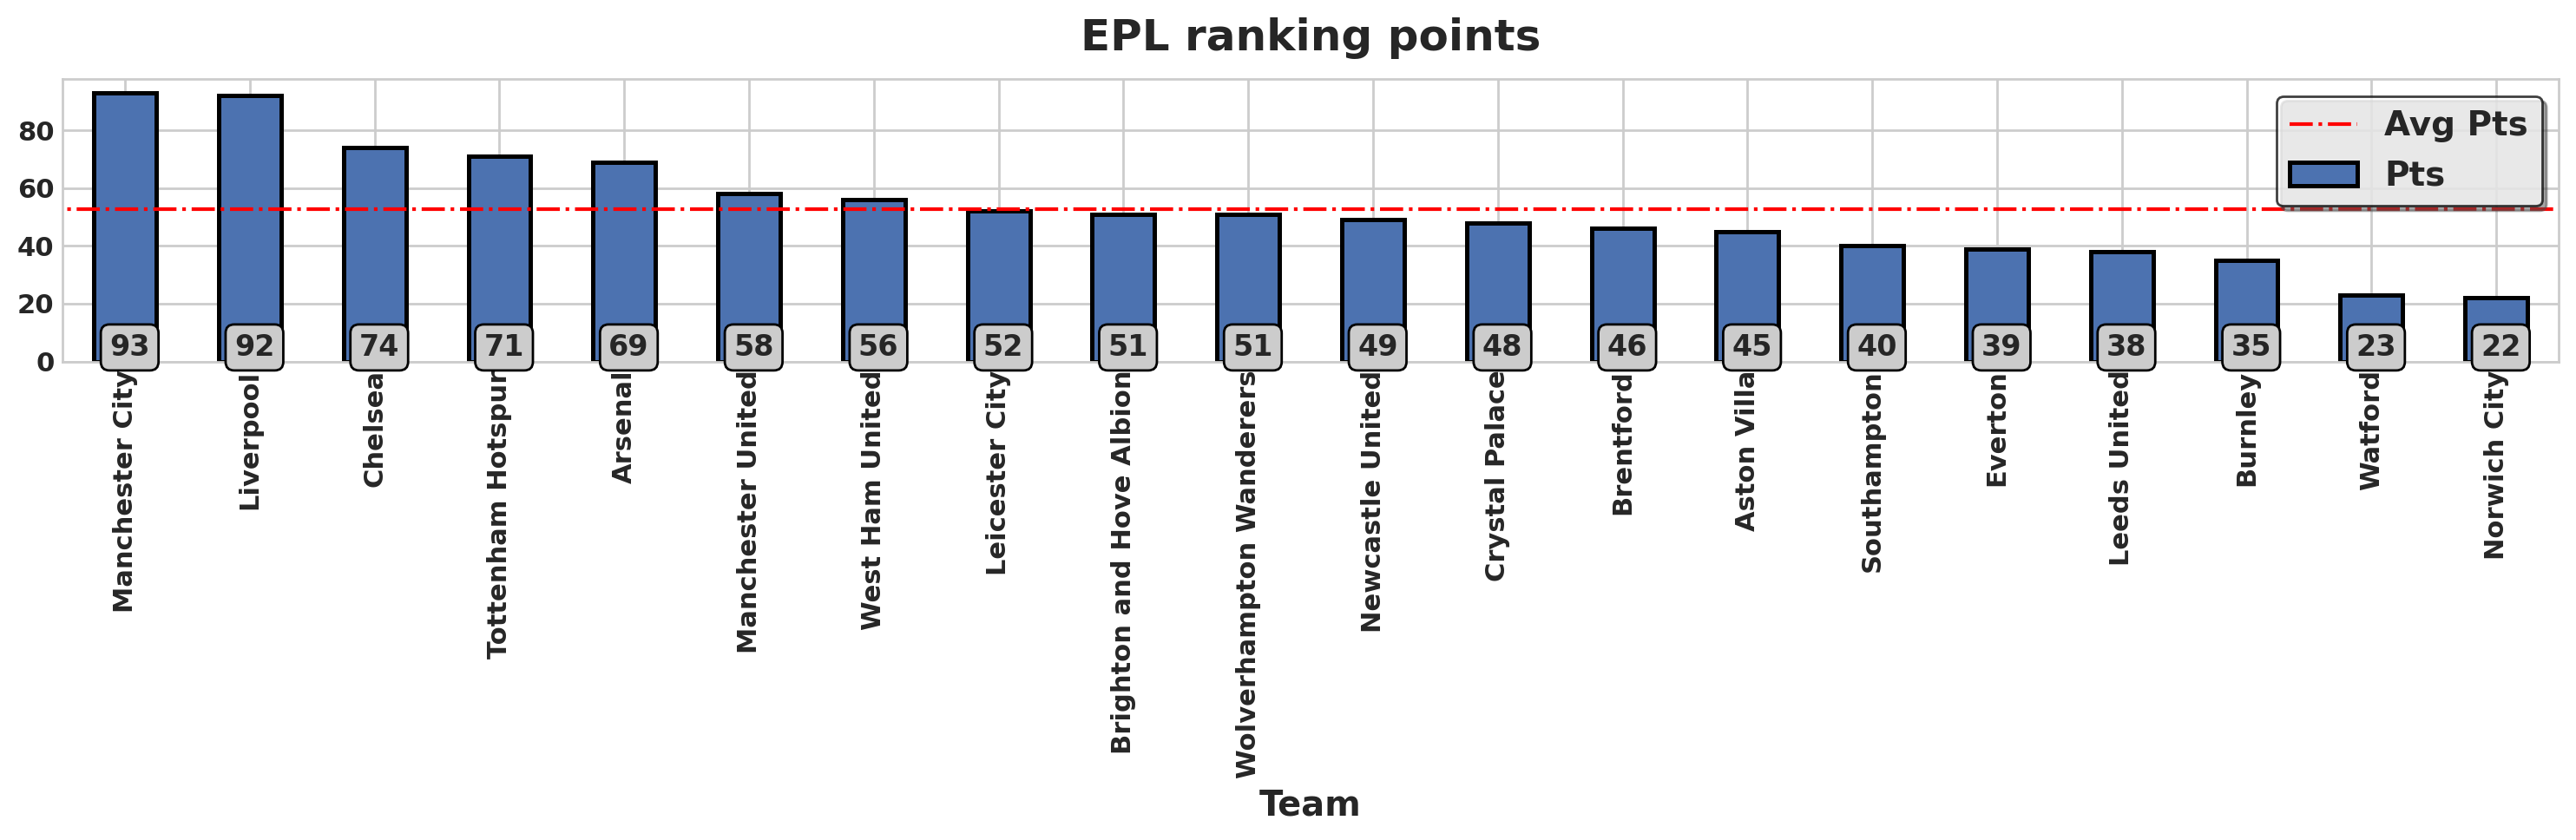

In [9]:
file3.plot(x='Team', y='Pts', kind='bar',figsize=(15,5), edgecolor='black', linewidth=1.8);
for i, u in enumerate(file3.Pts.tolist()):
        plt.annotate(str(u), xy=(i-0.1, u), xytext=(i-0.125, 2), bbox = dict(boxstyle="round", fc="0.8",
                                                                   color='black'))
plt.hlines(file3.Pts.mean(), -1, 20, label='Avg Pts', color='red', linestyles='dashdot');
plt.legend();
plt.title('EPL ranking points');

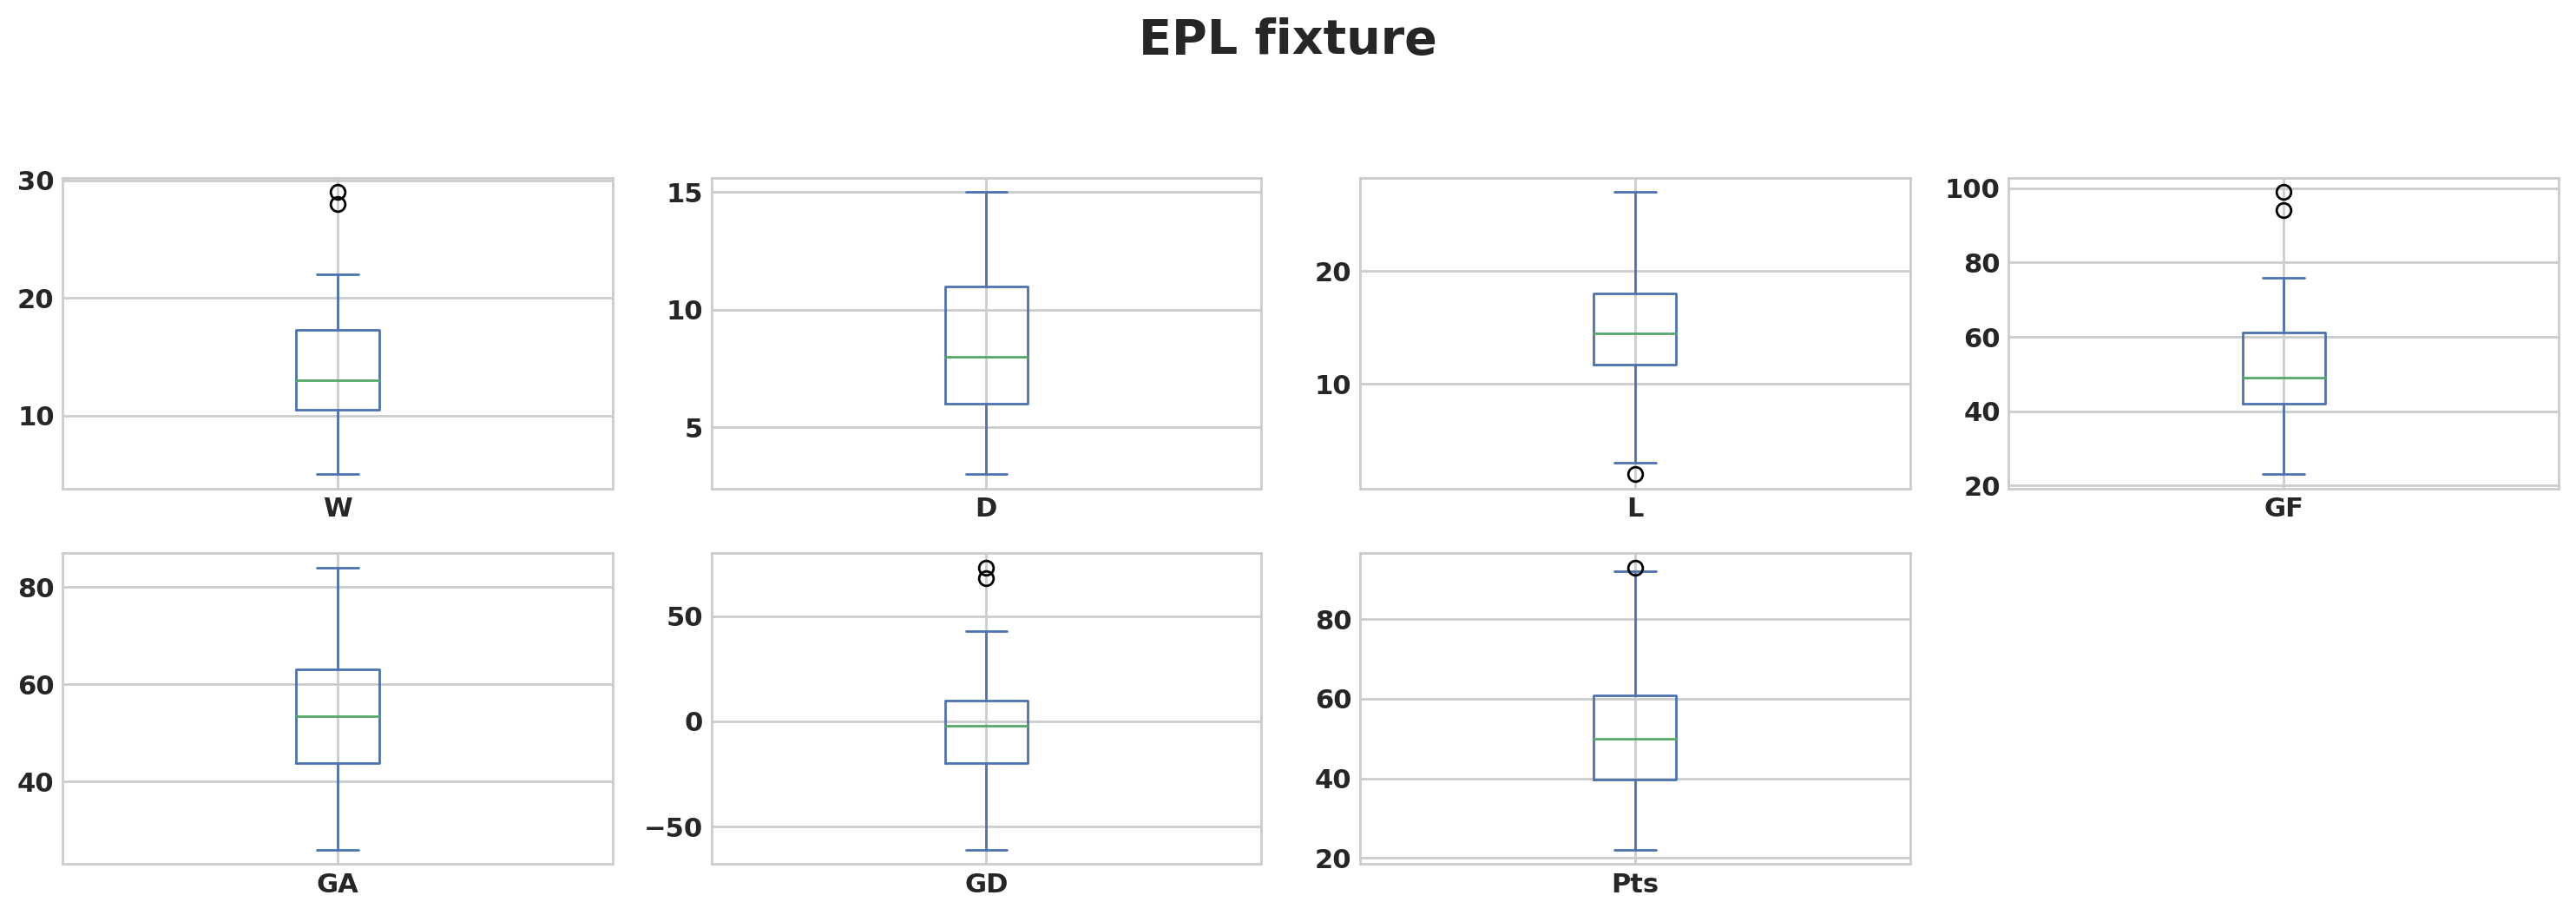

In [10]:
file3.drop(columns=['Pos','Pld']).plot(layout=(2, 4), subplots=True, kind='box');
plt.suptitle('EPL fixture', y=1.05);

In [11]:
t2 =file3.sort_values('GF', ascending=False)
vcols = t2.Team.tolist()[:5]

In [12]:
t2.head(5)[['Team','GF']].style.applymap(lambda v: tott_style if v in vcols  else None)\
.set_caption('⚽ Five Best attack ⚽').bar(align='mid')

In [13]:
t3 =file3.sort_values('GA', ascending=True)
vc = t3.Team.tolist()[:5]

In [14]:
t3.head(5)[['Team','GA']].style.applymap(lambda v: tott_style if v in vc  else None)\
.set_caption('⚽ Five Best defense ⚽').bar(align='mid')

In [15]:
file3.drop(columns=['Pos','Pld']).corr()

W         D         L        GF        GA        GD       Pts
W    1.000000 -0.347167 -0.858022  0.941549 -0.846085  0.947221  0.985222
D   -0.347167  1.000000 -0.183790 -0.201222  0.008447 -0.119768 -0.181409
L   -0.858022 -0.183790  1.000000 -0.876687  0.882204 -0.927242 -0.933315
GF   0.941549 -0.201222 -0.876687  1.000000 -0.796433  0.957023  0.950584
GA  -0.846085  0.008447  0.882204 -0.796433  1.000000 -0.937583 -0.885686
GD   0.947221 -0.119768 -0.927242  0.957023 -0.937583  1.000000  0.971409
Pts  0.985222 -0.181409 -0.933315  0.950584 -0.885686  0.971409  1.000000

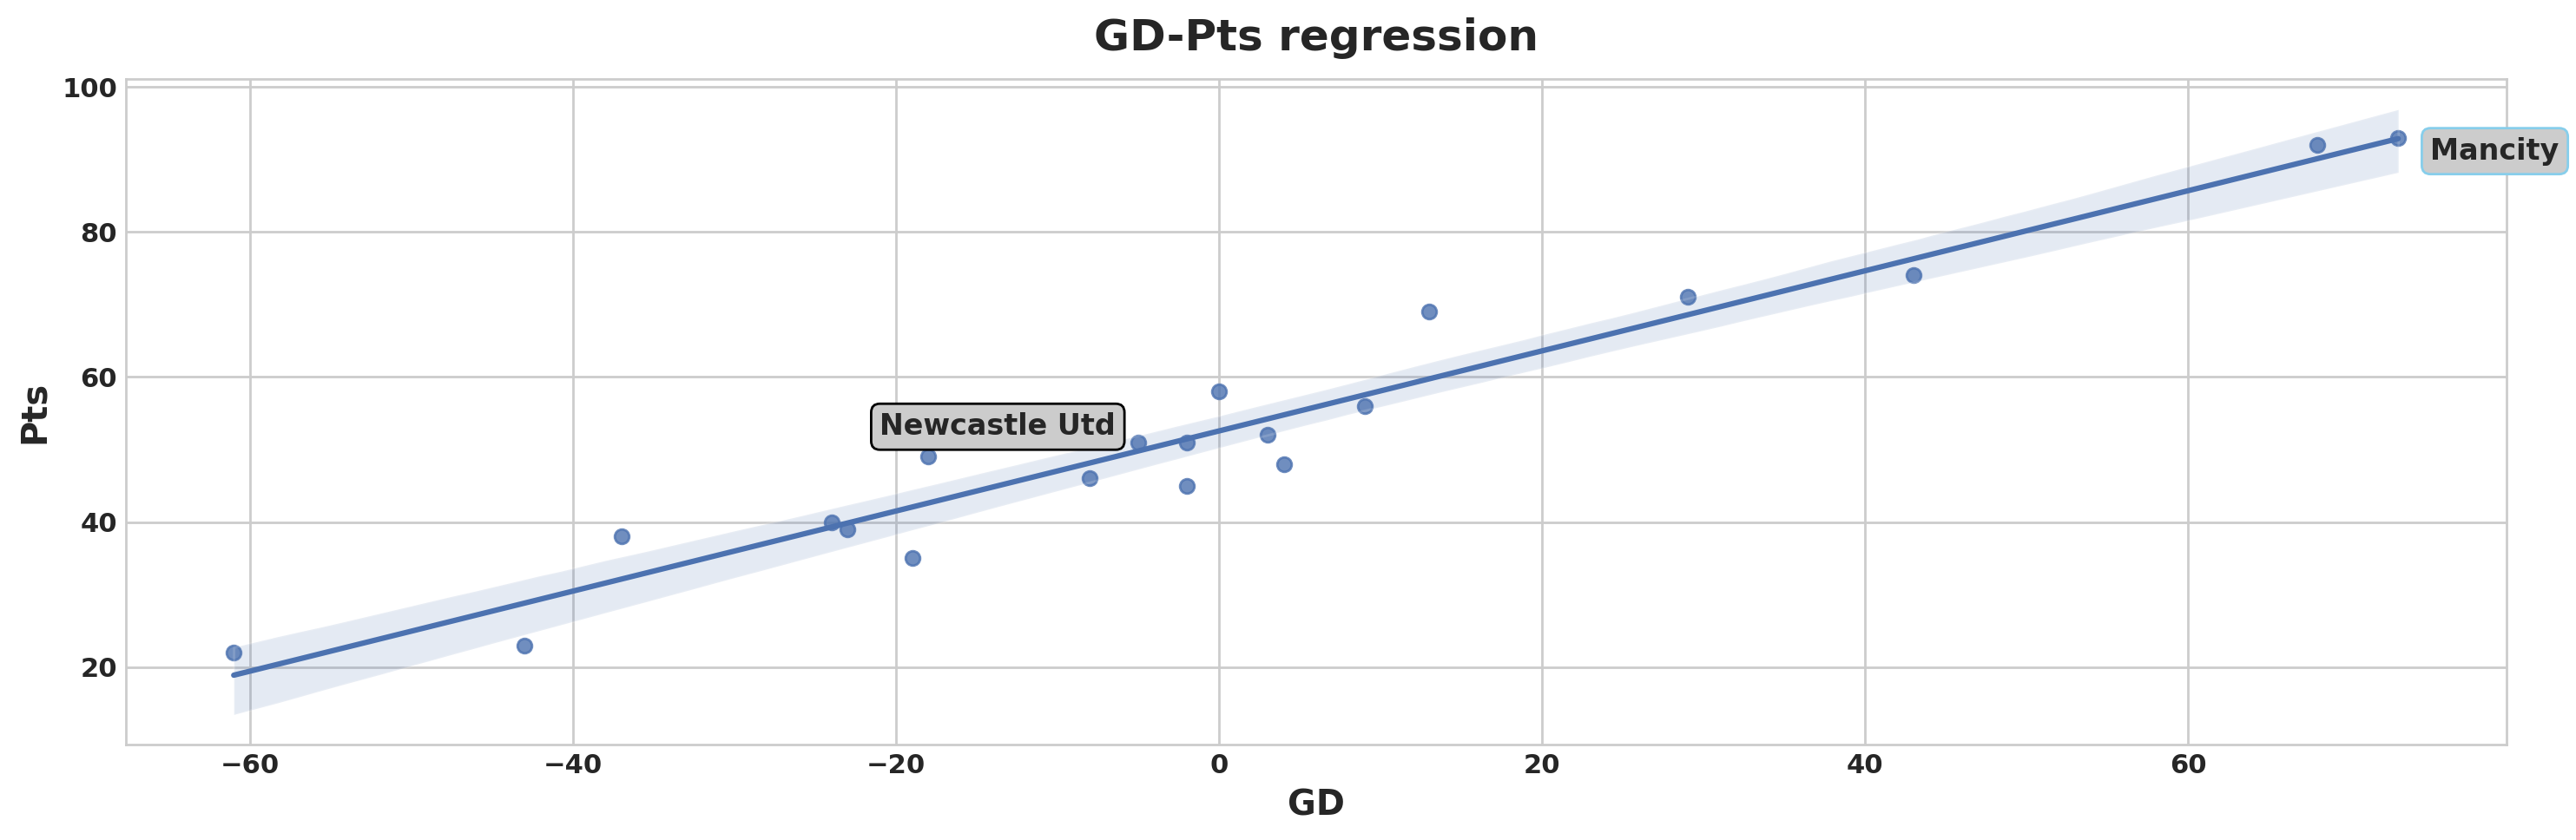

In [16]:
sns.regplot(x='GD', y='Pts', data=file3, robust=True);
plt.title('GD-Pts regression');

plt.annotate('Mancity', xy=(75, 93), xytext=(75, 90), 
             bbox = dict(boxstyle="round", fc="0.8", color='skyblue'));

plt.annotate('Newcastle Utd', xy=(-18, 49), xytext=(-21, 52), 
             bbox = dict(boxstyle="round", fc="0.8", color='black'));


In [17]:
allresult = pd.read_csv("all_match_results.csv")

In [18]:
allresult['Date'] = pd.to_datetime(allresult['Date'])

In [19]:
newcastle_utd_home = allresult[allresult.HomeTeam == 'Newcastle United']
newcastle_utd_away = allresult[allresult.AwayTeam == 'Newcastle United']

In [20]:
first_leg = newcastle_utd_home[newcastle_utd_home.Date < '2022-01-05'].append(newcastle_utd_away[newcastle_utd_away.Date < '2022-01-05']) 
second_leg = newcastle_utd_home[newcastle_utd_home.Date > '2022-01-05'].append(newcastle_utd_away[newcastle_utd_away.Date > '2022-01-05'])

In [21]:
first_leg.sort_values('Date', inplace=True)
first_leg.set_index('Date', inplace=True)

In [22]:
def wdl_home(data):
    
    decision = []
    gf = []
    ga = []
    home = data[data.HomeTeam == 'Newcastle United']
    
    for u, v in [row.split(':') for row in home.Result.tolist()]:
        
        u = int(u)
        v = int(v)
        if u > v:
            decision.append('W')
            gf.append(u)
            ga.append(v)
        elif u < v:
            decision.append('L')
            gf.append(u)
            ga.append(v)
        else:
            decision.append('D')
            gf.append(u)
            ga.append(v)
    home['WDL'] = decision
    home['Scored'] = gf
    home['Conceded'] = ga
    home['GD'] = home['Scored'] - home['Conceded']
    return home

def wdl_away(data):
    
    decision = []
    gf = []
    ga = []
    
    away = data[data.AwayTeam == 'Newcastle United']
    
    for u, v in [row.split(':') for row in away.Result.tolist()]:
        
        u = int(u)
        v = int(v)
        if u > v:
            decision.append('L')
            gf.append(v)
            ga.append(u)
        elif u < v:
            decision.append('W')
            gf.append(v)
            ga.append(u)
        else:
            decision.append('D')
            gf.append(v)
            ga.append(u)
            
    away['WDL'] = decision
    away['Scored'] = gf
    away['Conceded'] = ga
    away['GD'] = away['Scored'] - away['Conceded']
    return away


In [23]:
home_1stleg = wdl_home(first_leg)
away_1stleg = wdl_away(first_leg)

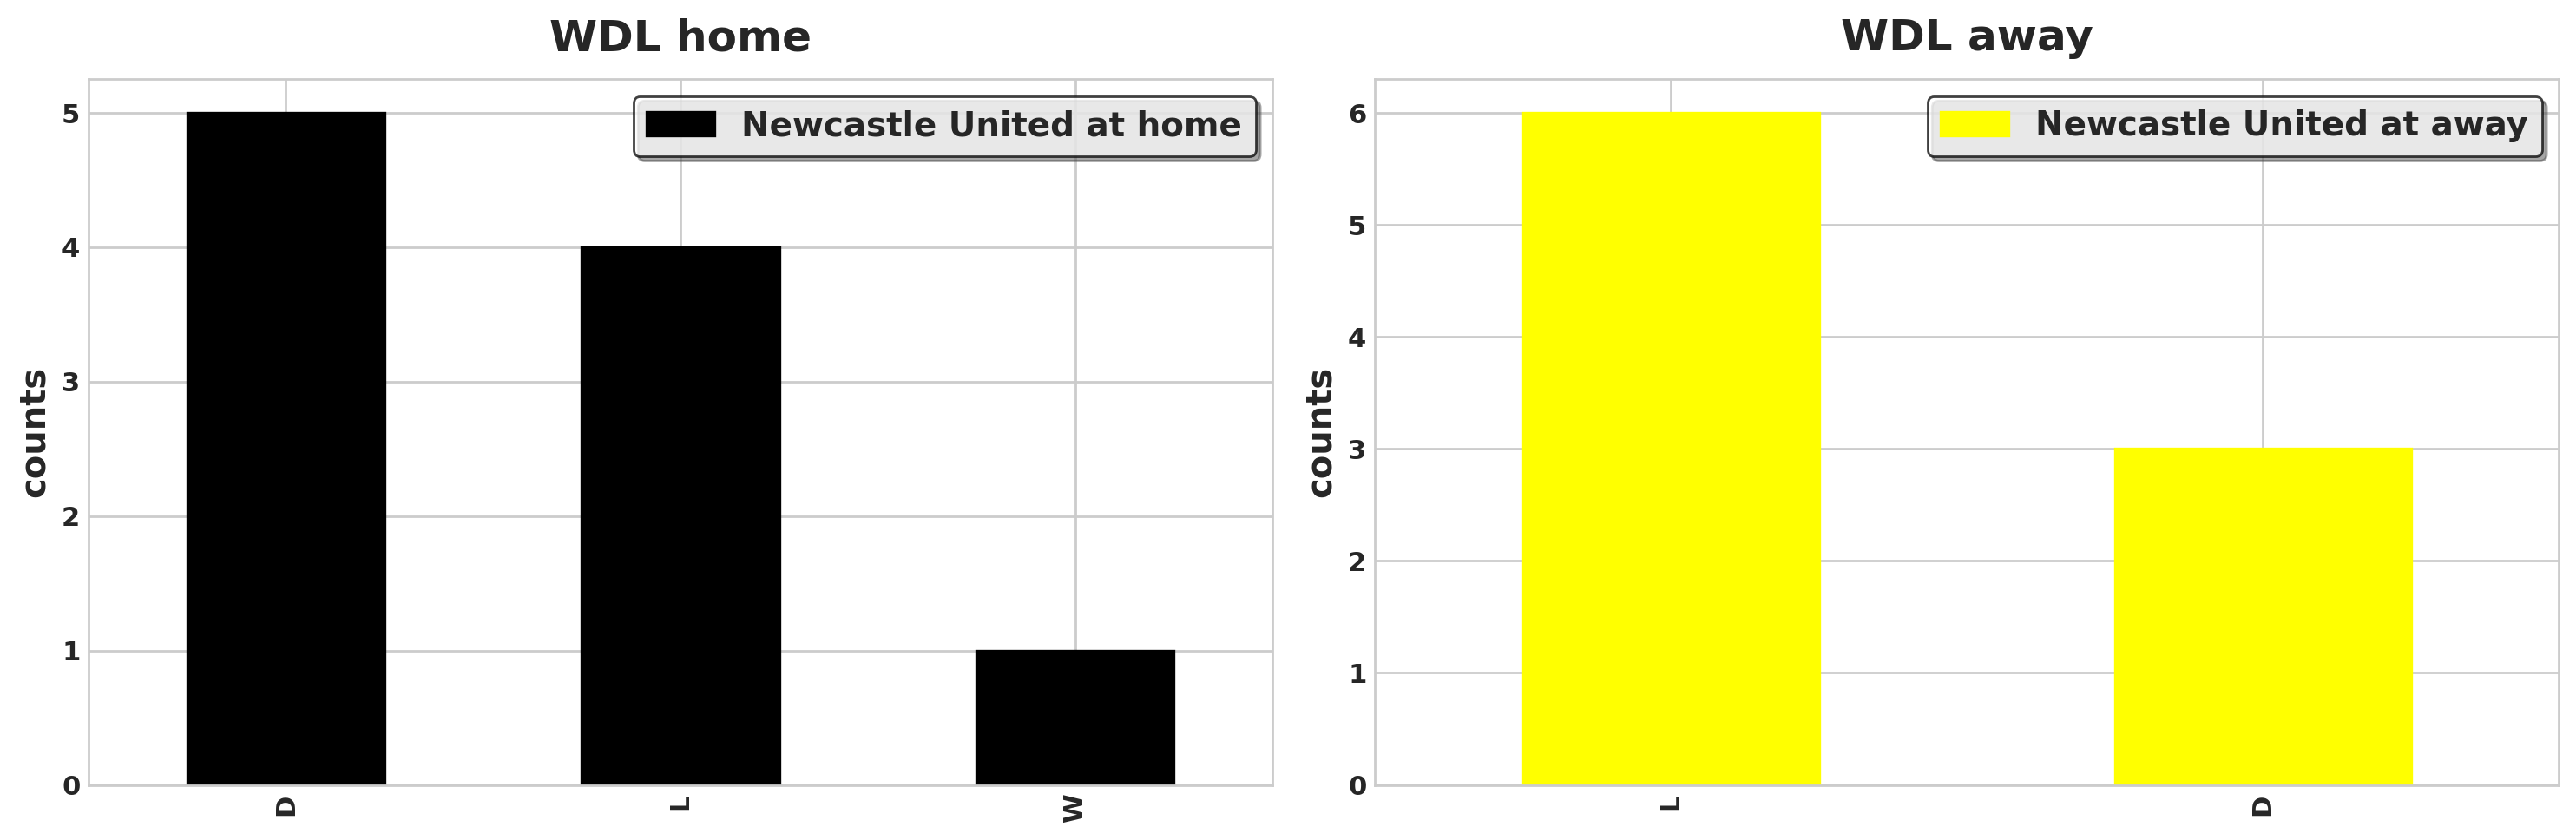

In [24]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
home_1stleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle United at home',
                                        color='black', ax=ax1);
ax1.set_ylabel('counts')
ax1.set_title('WDL home')
ax1.legend();
away_1stleg.WDL.value_counts().plot.bar(edgecolor='yellow', linewidth=1.2, label='Newcastle United at away',
                                        color='yellow', ax=ax2);
ax2.set_title('WDL away')
ax2.set_ylabel('counts')
ax2.legend();

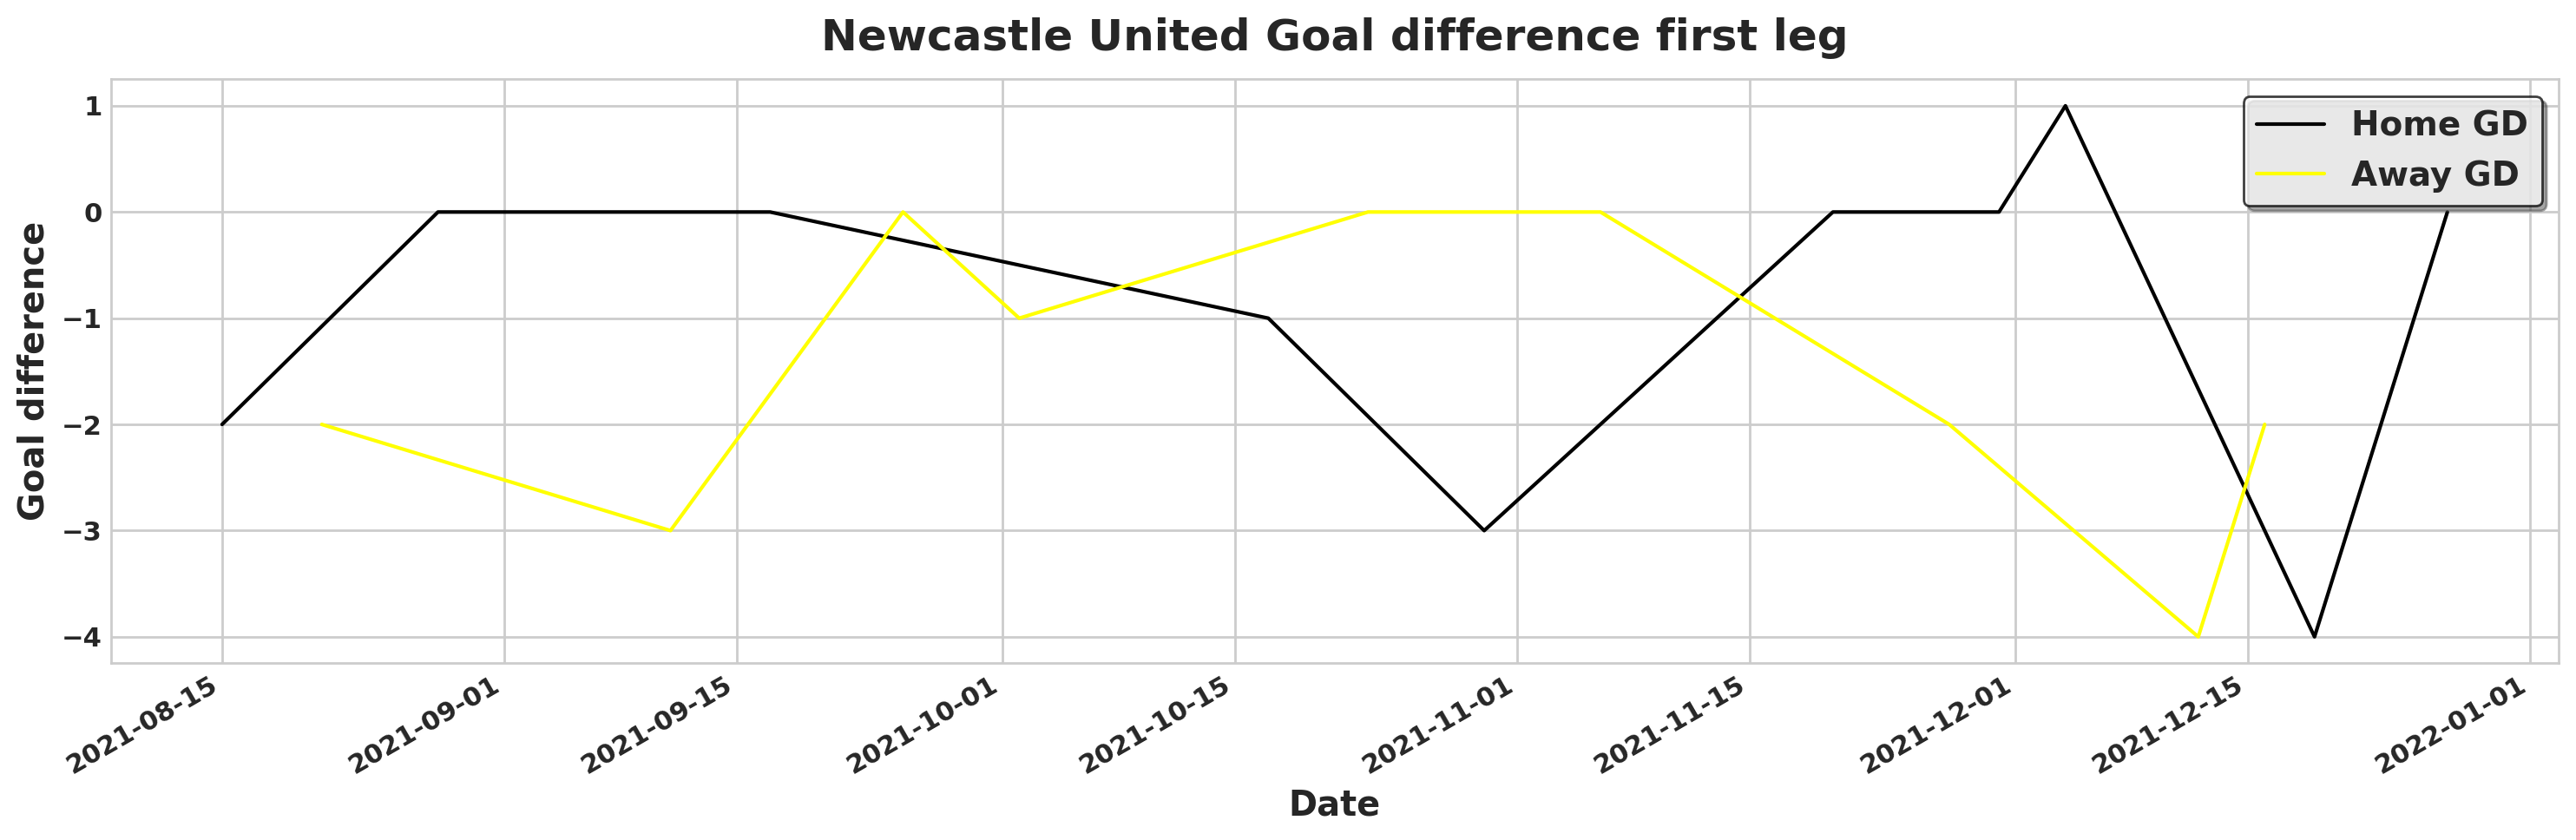

In [25]:
home_1stleg.GD.plot(color='black',label='Home GD');
away_1stleg.GD.plot(color='yellow',label='Away GD');
plt.legend();
plt.ylabel('Goal difference');
plt.title('Newcastle United Goal difference first leg');

In [26]:
home_1stleg.iloc[[0,4], :]

HomeTeam Result         AwayTeam WDL  Scored  Conceded  GD
Date                                                                          
2021-08-15  Newcastle United    2:4  West Ham United   L       2         4  -2
2021-10-30  Newcastle United    0:3          Chelsea   L       0         3  -3

In [27]:
home_1stleg.mean()

Scored      1.3
Conceded    2.2
GD         -0.9
dtype: float64

In [28]:
away_1stleg.iloc[[3,4,5], :]

HomeTeam Result          AwayTeam WDL  Scored  \
Date                                                                        
2021-10-02   Wolverhampton Wanderers    2:1  Newcastle United   L       1   
2021-10-23            Crystal Palace    1:1  Newcastle United   D       1   
2021-11-06  Brighton and Hove Albion    1:1  Newcastle United   D       1   

            Conceded  GD  
Date                      
2021-10-02         2  -1  
2021-10-23         1   0  
2021-11-06         1   0

In [29]:
away_1stleg.mean()

Scored      0.666667
Conceded    2.222222
GD         -1.555556
dtype: float64

In [30]:
second_leg.sort_values('Date', inplace=True)
second_leg.set_index('Date', inplace=True)

In [31]:
home_2ndleg = wdl_home(second_leg)
away_2ndleg = wdl_away(second_leg)

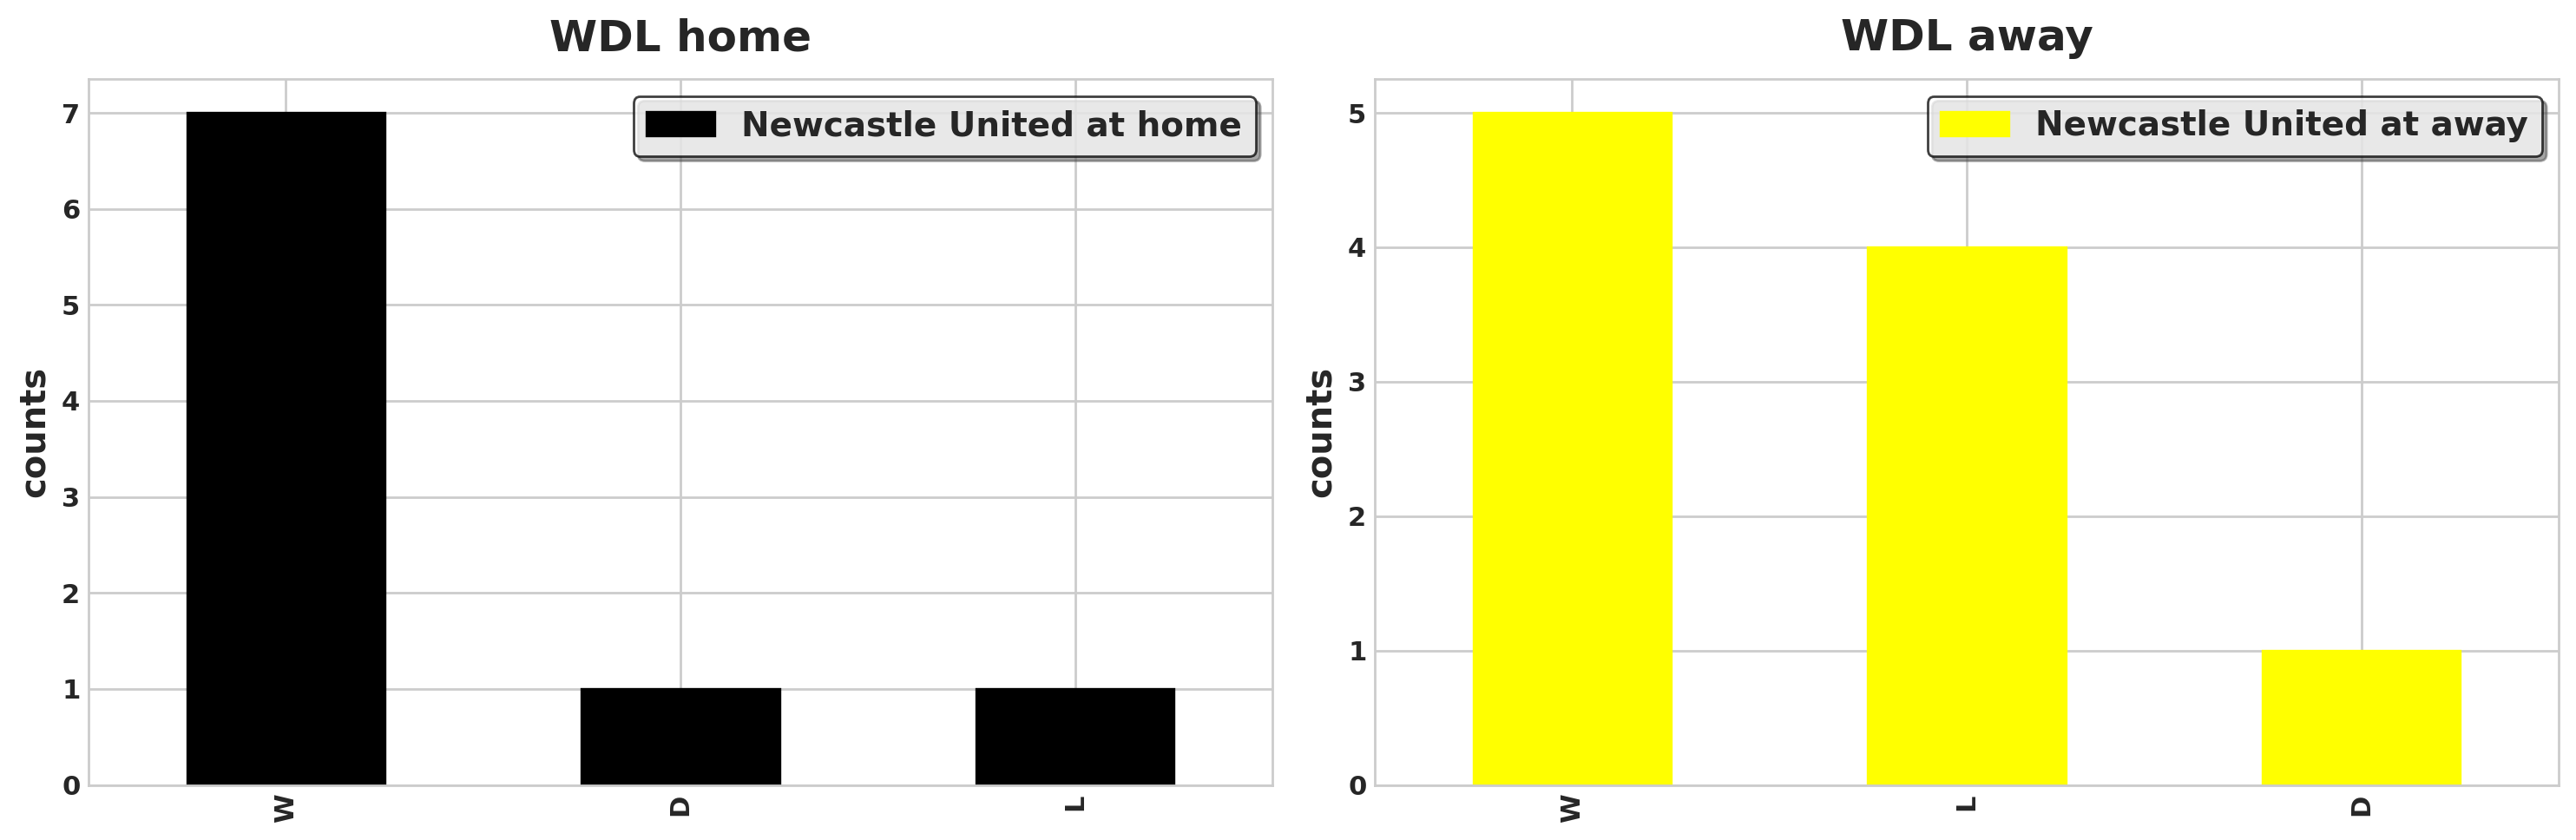

In [32]:
fig1 = plt.figure(figsize=(15, 5))
fig1.subplots_adjust(wspace=0.3)
axis1 = fig1.add_subplot(1,2,1)
axis2 = fig1.add_subplot(1,2,2)
home_2ndleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle United at home',
                                        color='black', ax=axis1);
axis1.set_ylabel('counts')
axis1.set_title('WDL home')
axis1.legend();
away_2ndleg.WDL.value_counts().plot.bar(edgecolor='yellow', linewidth=1.2, label='Newcastle United at away',
                                        color='yellow', ax=axis2);
axis2.set_title('WDL away')
axis2.set_ylabel('counts')
axis2.legend();

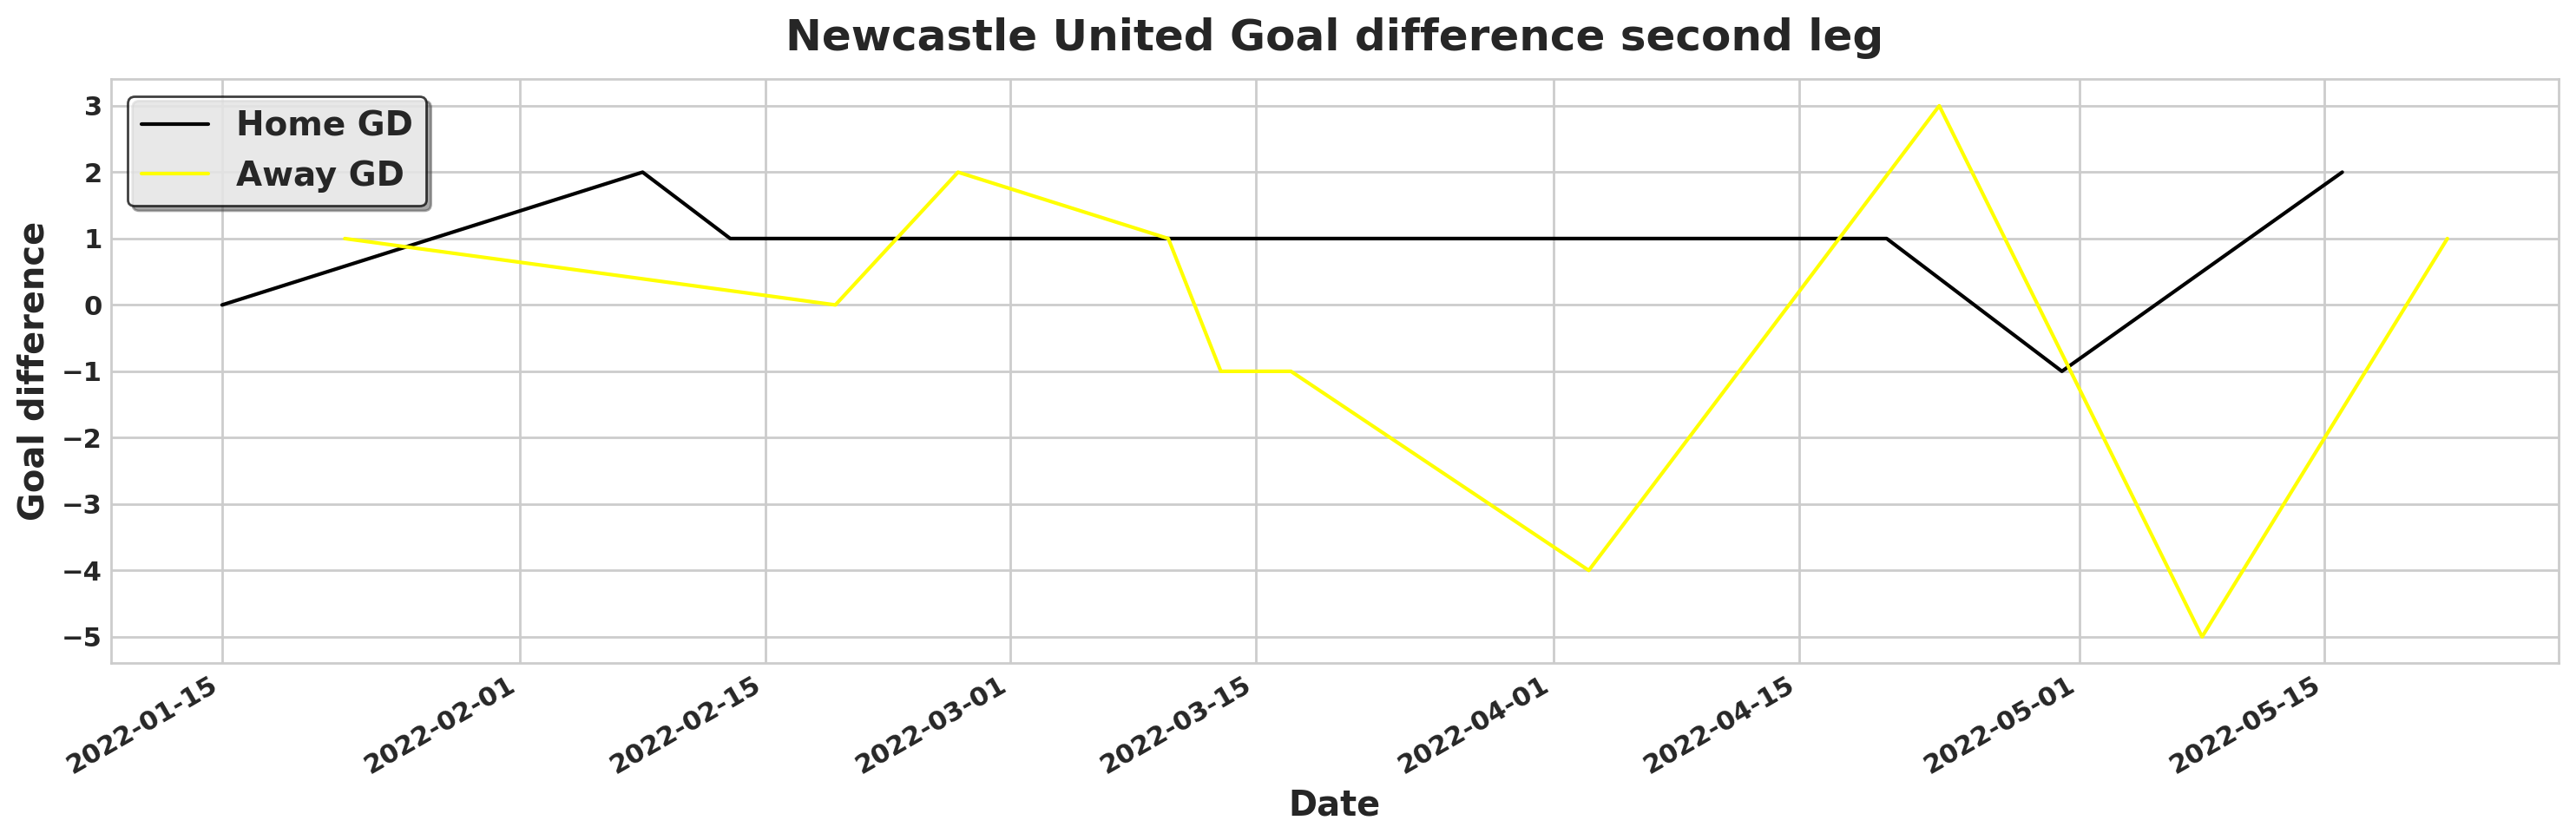

In [33]:
home_2ndleg.GD.plot(color='black',label='Home GD');
away_2ndleg.GD.plot(color='yellow',label='Away GD');
plt.legend()
plt.ylabel('Goal difference');
plt.title('Newcastle United Goal difference second leg');

In [651]:
home_2ndleg.iloc[[4,6,8], :]

HomeTeam Result                 AwayTeam WDL  Scored  \
Date                                                                       
2022-04-08  Newcastle United    1:0  Wolverhampton Wanderers   W       1   
2022-04-20  Newcastle United    1:0           Crystal Palace   W       1   
2022-05-16  Newcastle United    2:0                  Arsenal   W       2   

            Conceded  GD  
Date                      
2022-04-08         0   1  
2022-04-20         0   1  
2022-05-16         0   2

In [652]:
home_2ndleg.mean()

Scored      1.444444
Conceded    0.555556
GD          0.888889
dtype: float64

In [34]:
away_2ndleg.iloc[[1,3,4], :]

HomeTeam Result          AwayTeam WDL  Scored  Conceded  GD
Date                                                                          
2022-02-19  West Ham United    1:1  Newcastle United   D       1         1   0
2022-03-10      Southampton    1:2  Newcastle United   W       2         1   1
2022-03-13          Chelsea    1:0  Newcastle United   L       0         1  -1

In [35]:
away_2ndleg.mean()

Scored      1.2
Conceded    1.5
GD         -0.3
dtype: float64

In [36]:
week_match = allresult.copy()

In [37]:
def homeResult(row):
    H, A = row.split(':')
    
    if int(H) > int(A):
        return 'W'
    elif int(H) < int(A):
        return 'L'
    else:
        return 'D'
    
def awayResult(row):
    H, A = row.split(':')
    
    if int(H) > int(A):
        return 'L'
    elif int(H) < int(A):
        return 'W'
    else:
        return 'D'

def gdhome(row):
    H, A = row.split(':')
    return int(H) - int(A)

def gdaway(row):
    H, A = row.split(':')
    return int(A) - int(H)

In [38]:
week_match['IsHomeTeam'] = week_match['Result'].apply(homeResult)
week_match['IsAwayTeam'] = week_match['Result'].apply(awayResult)

In [39]:
week_match['GDHomeTeam'] = week_match['Result'].apply(gdhome)
week_match['GDAwayTeam'] = week_match['Result'].apply(gdaway)

In [40]:
teams = file3['Team'].tolist()
club = {}
for t in teams:
    
    game_week = {}
    game_week[0] = 0
    data_t = week_match[week_match.HomeTeam == t].append(week_match[week_match.AwayTeam == t])
    data_t.sort_values('Date', inplace=True)
    weeks = data_t.Date.tolist()
    
    for i, w in enumerate(weeks):
    
    
        data_week = data_t[data_t.Date == w]
        
        i = i+1
        #print(data_week)
        
        if t in data_week.HomeTeam.tolist():
            
            if data_week.IsHomeTeam.values[0] == 'W':
                game_week[i] = game_week[i-1] + 3
                
            elif data_week.IsHomeTeam.values[0] == 'L':
                game_week[i] = game_week[i-1]
            else:
                game_week[i] = game_week[i-1] + 1
        
        if t in data_week.AwayTeam.tolist():
            if data_week.IsAwayTeam.values[0] == 'W':
                game_week[i] = game_week[i-1] + 3
            elif data_week.IsAwayTeam.values[0] == 'L':
                game_week[i] = game_week[i-1]
            else:
                game_week[i] = game_week[i-1] + 1
                
       
        
    club[t] = {f'Week {w+1}': game_week[w+1] for w in range(len(weeks))}

In [41]:
club = pd.DataFrame(club)

In [42]:
players_stats = pd.read_csv("all_players_stats.csv")

In [43]:
stats_newcastle_utd = players_stats[players_stats['Team'] == 'Newcastle United']

In [44]:
defensive = stats_newcastle_utd[stats_newcastle_utd['Position'].isin(['Goalkeeper', 'Defender'])]
midfield = stats_newcastle_utd[stats_newcastle_utd['Position'].isin(['Midfielder','Midfielder/Forward',
                                                       'Defender/Midfielder', 
                                                       'Defender/Midfielder/Forward'])]
offensive = stats_newcastle_utd[stats_newcastle_utd['Position'].isin(['Forward'])]

In [45]:
defensive.sort_values(by='Apearances', ascending=False)

Team  JerseyNo              Player    Position  Apearances  \
420  Newcastle United         1     Martin Dúbravka  Goalkeeper          27   
436  Newcastle United         5        Fabian Schär    Defender          26   
429  Newcastle United         6    Jamaal Lascelles    Defender          23   
428  Newcastle United        17         Emil Krafth    Defender          20   
417  Newcastle United        33            Dan Burn    Defender          16   
432  Newcastle United        19      Javi Manquillo    Defender          16   
438  Newcastle United        13        Matt Targett    Defender          16   
419  Newcastle United        26         Karl Darlow  Goalkeeper           8   
422  Newcastle United        18  Federico Fernández    Defender           5   
443  Newcastle United        27     Freddie Woodman  Goalkeeper           5   
421  Newcastle United         3        Paul Dummett    Defender           2   

     Substitutions  Goals  Penalties  YellowCards  RedCards  
420              0      0          0          1.0       0.0  
436              0      2          0          4.0       0.0  
429              4      1          0          5.0       0.0  
428              2      0          0          5.0       0.0  
417              0      0          0          4.0       0.0  
432              5      1          0          5.0       0.0  
438              0      0          0          1.0       0.0  
419              0      0          0          1.0       0.0  
422              2      0          0          0.0       0.0  
443              0      0          0          0.0       0.0  
421              1      0          0          2.0       0.0

In [46]:
midfield.sort_values(by='Apearances', ascending=False).iloc[:15, :]

Team  JerseyNo               Player             Position  \
427  Newcastle United         7            Joelinton   Midfielder/Forward   
435  Newcastle United        10  Allan Saint-Maximin   Midfielder/Forward   
440  Newcastle United        28          Joe Willock           Midfielder   
437  Newcastle United         8        Jonjo Shelvey           Midfielder   
423  Newcastle United        21          Ryan Fraser           Midfielder   
415  Newcastle United        24       Miguel Almirón   Midfielder/Forward   
431  Newcastle United        36       Sean Longstaff   Midfielder/Forward   
434  Newcastle United        11         Matt Ritchie           Midfielder   
433  Newcastle United        23         Jacob Murphy           Midfielder   
418  Newcastle United         2         Ciaran Clark  Defender/Midfielder   
425  Newcastle United        14         Isaac Hayden  Defender/Midfielder   
416  Newcastle United        39      Bruno Guimarães           Midfielder   
439  Newcastle United        15      Kieran Trippier  Defender/Midfielder   
430  Newcastle United        12          Jamal Lewis  Defender/Midfielder   
426  Newcastle United        16        Jeff Hendrick           Midfielder   

     Apearances  Substitutions  Goals  Penalties  YellowCards  RedCards  
427          32              5      4          0          8.0       0.0  
435          32              5      5          0          6.0       0.0  
440          24              7      2          0          0.0       0.0  
437          23              2      2          0          5.0       1.0  
423          20              9      2          0          3.0       0.0  
415          19             13      1          0          2.0       0.0  
431          17              9      1          0          1.0       0.0  
434          15              4      0          0          5.0       0.0  
433          14             20      1          0          4.0       0.0  
418          13              1      0          0          2.0       1.0  
425          12              2      1          0          5.0       0.0  
416          11              6      5          0          4.0       0.0  
439           6              1      2          0          0.0       0.0  
430           5              1      0          0          1.0       0.0  
426           1              3      1          0          0.0       0.0

In [47]:
offensive.sort_values(by='Apearances', ascending=False).iloc[:10, :]

Team  JerseyNo         Player Position  Apearances  \
441  Newcastle United         9  Callum Wilson  Forward          16   
442  Newcastle United        20     Chris Wood  Forward          15   
424  Newcastle United        34   Dwight Gayle  Forward           1   

     Substitutions  Goals  Penalties  YellowCards  RedCards  
441              2      8          2          4.0       0.0  
442              2      2          1          0.0       0.0  
424              8      0          0          1.0       0.0

In [48]:
players_selected_home = [1,5,33,16,17,6,15,11,10,24,9]
players_selected_away = [1,5,33,16,17,6,15,11,10,24,9]

In [49]:
def pitch_plotting(js_home=None, js_away=None):
    """
        @params js_home: is a jersey number of player at home
        @params js_away: is a jersey number of player at away
        
        return graphs
    """
    #to 
    formation4231 = {'Position': ['GK','LB','CB','CB','RB','MD','MD','CAM','LW','RW','ST'],
                'X': [5, 20, 20, 20, 20, 40, 40, 70, 70, 70, 95],
                'Y': [40, 10, 30, 50, 70, 30, 50, 40, 10, 70, 40]}
    formation4231 = {'Position': ['GK','LB','CB','CB','RB','MD','MD','LM','RM','CAM','ST'],
                'X': [5, 20, 20, 20, 20, 40, 40, 70, 70, 70, 95],
                'Y': [40, 10, 30, 50, 70, 30, 50, 40, 10, 70, 40]}
    
    #plotting
    pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True)
    figure, axs = pitch.grid(figheight=8, endnote_height=0, title_height=0.1,
                             title_space=0.02, 
                             axis=False, space=0.5,
                             grid_height=0.83, nrows=1, ncols=2)

    sc1 = pitch.scatter(formation4231['X'] , formation4231['Y'], s=600, c='black', 
                        label='4-2-3-1 (Home)', ax=axs['pitch'][0] )
    # plot the jersey numbers
    for i, label in enumerate(js_home):
        pitch.annotate(label, (formation4231['X'][i] , formation4231['Y'][i]),
                       va='center', ha='center', color='white',fontsize=15, ax=axs['pitch'][0],
                      bbox = dict(boxstyle="circle,pad=0.5", fc='black', color='green'))
    axs['pitch'][0].legend(loc='best', labelspacing=1.5)

    
    sc2 = pitch.scatter(formation4231['X'] , formation4231['Y'],
                        s=500, c='yellow', label='4-2-3-1 (Away)', ax=axs['pitch'][1])
    # plot the jersey numbers
    for i, label in enumerate(js_away):
        pitch.annotate(label, (formation4231['X'][i] , formation4231['Y'][i]),
                       va='center', ha='center', color='white',fontsize=15, ax=axs['pitch'][1],
                      bbox = dict(boxstyle="circle,pad=0.5", fc='yellow', color='yellow'))
    axs['pitch'][1].legend(loc='best', labelspacing=1.5);
    # title
    axs['title'].text(0.5, 0.5, 'Newcastle United F.C formation',va='center', ha='center',
                      color='black',fontsize=18);


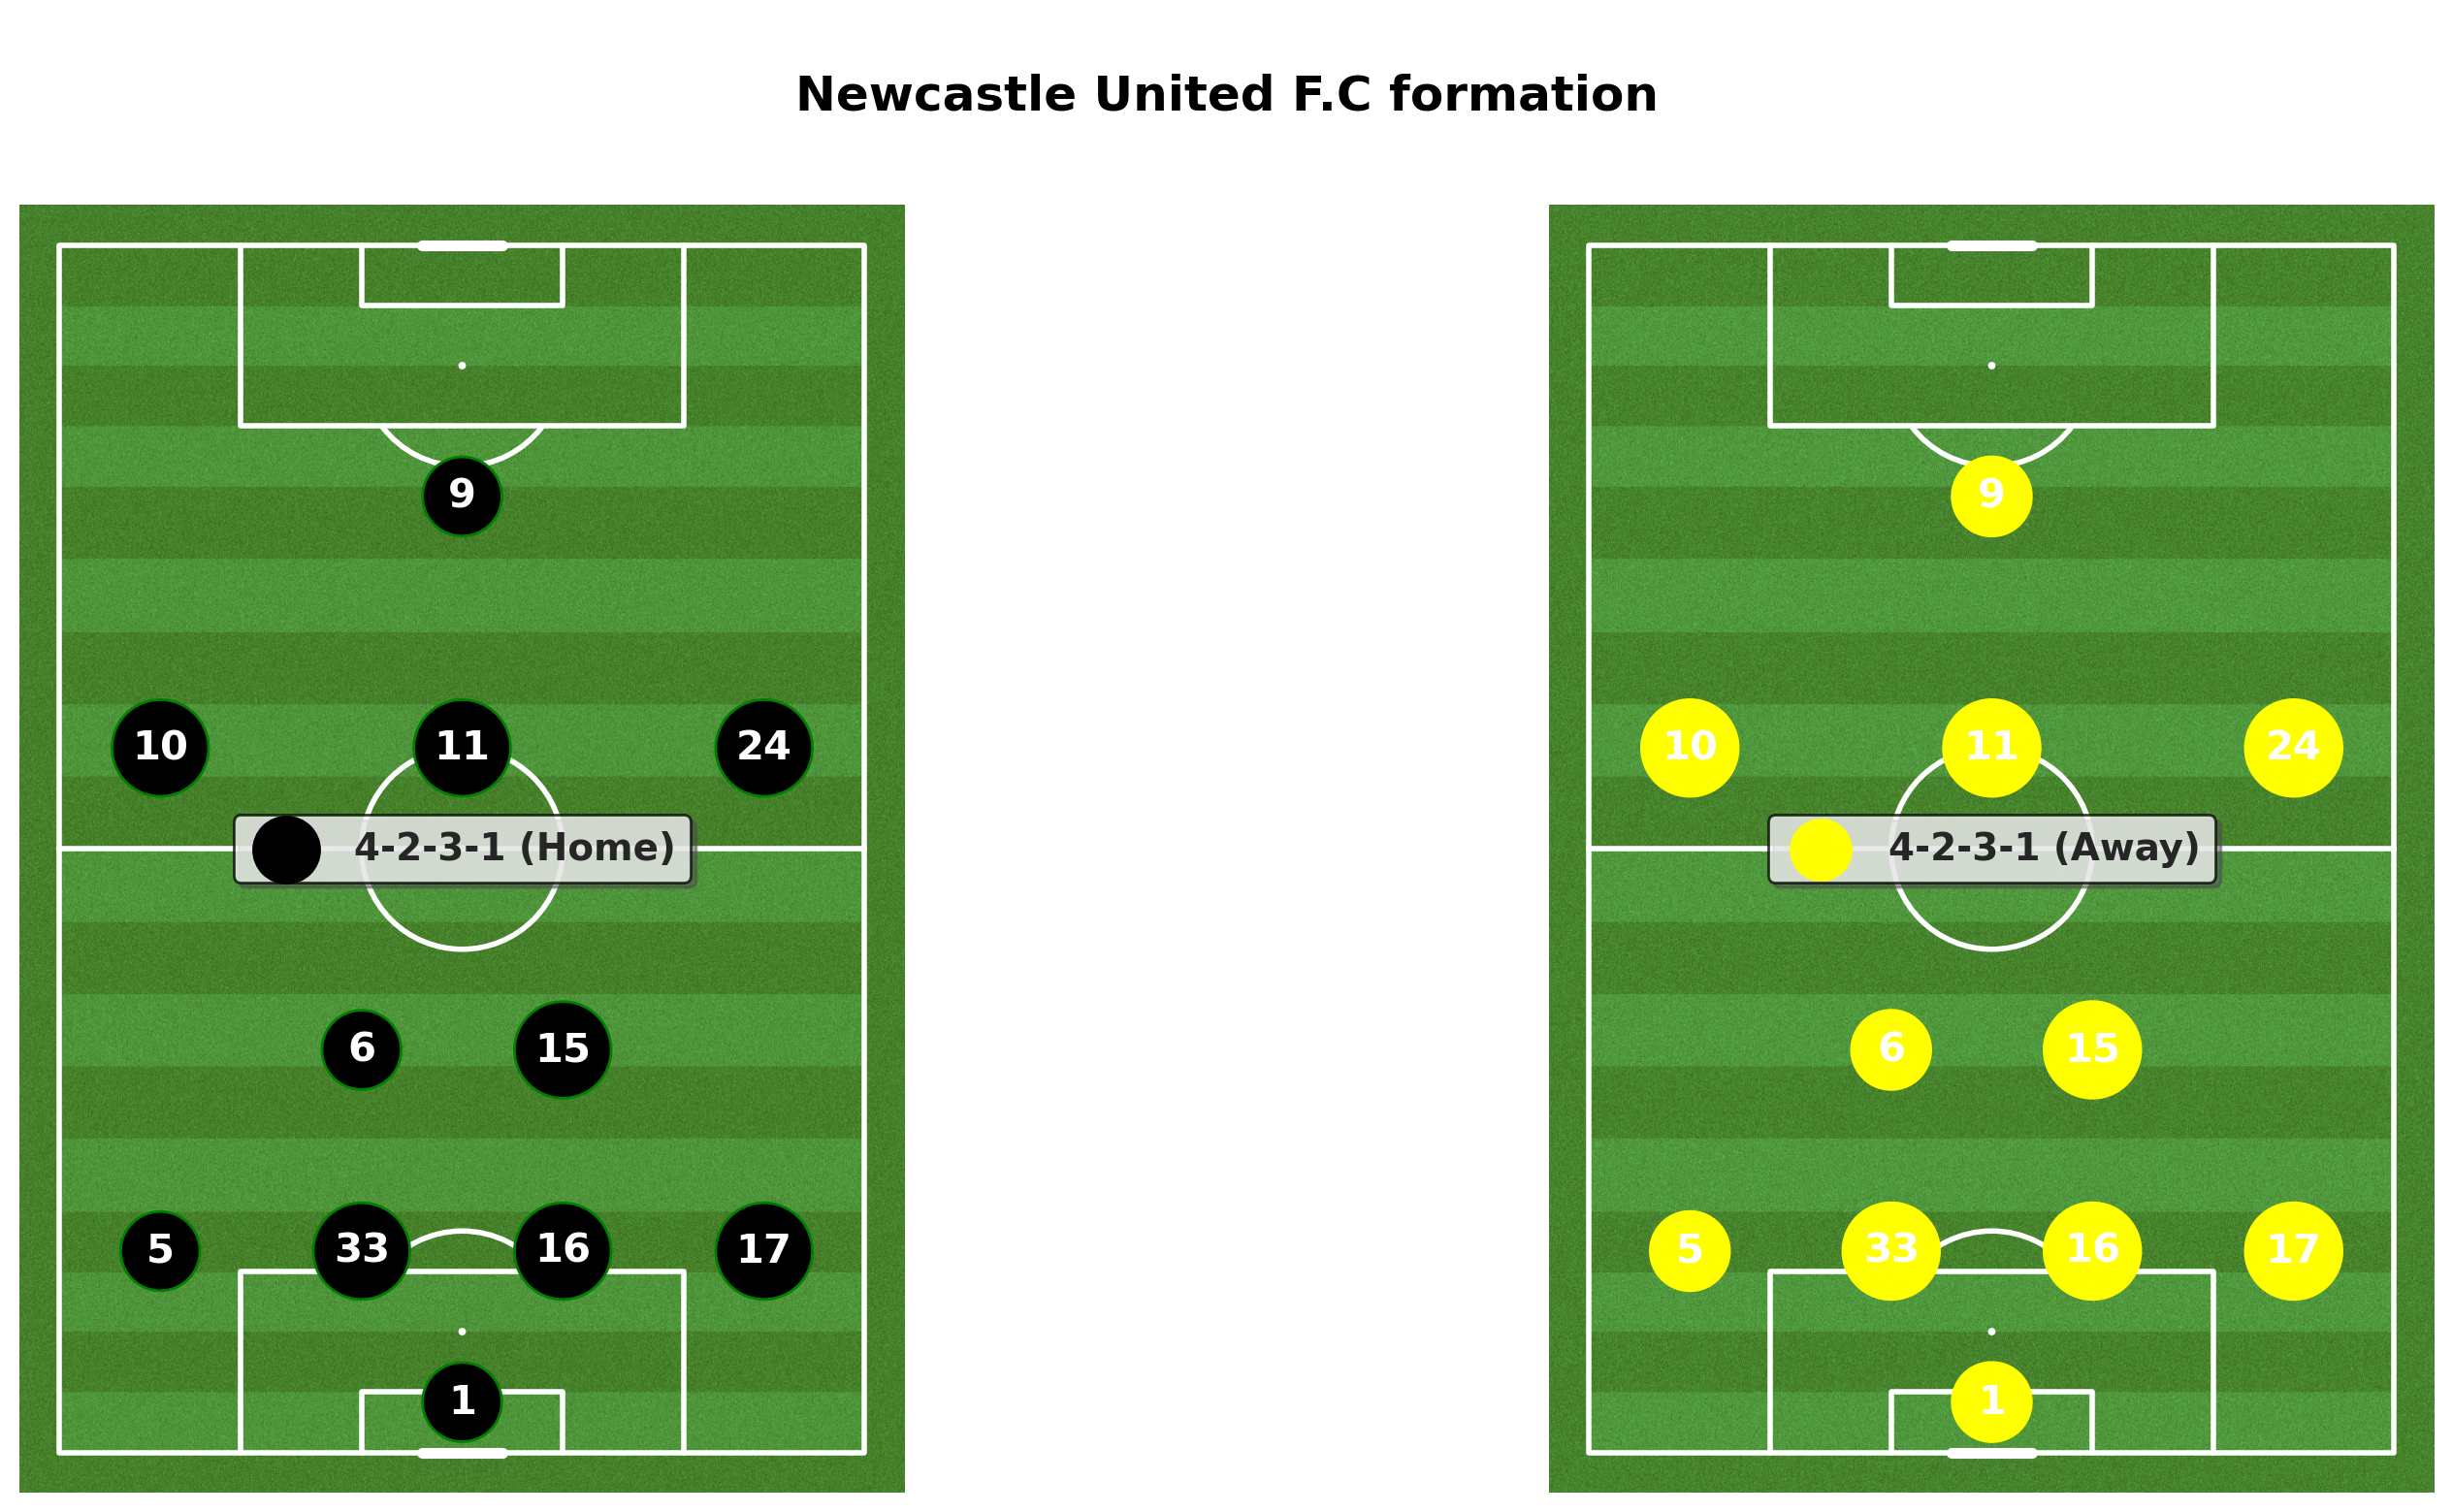

In [50]:
pitch_plotting(js_home=players_selected_home, js_away=players_selected_away)

In [51]:
players_goals =  stats_newcastle_utd[stats_newcastle_utd.Goals > 1]

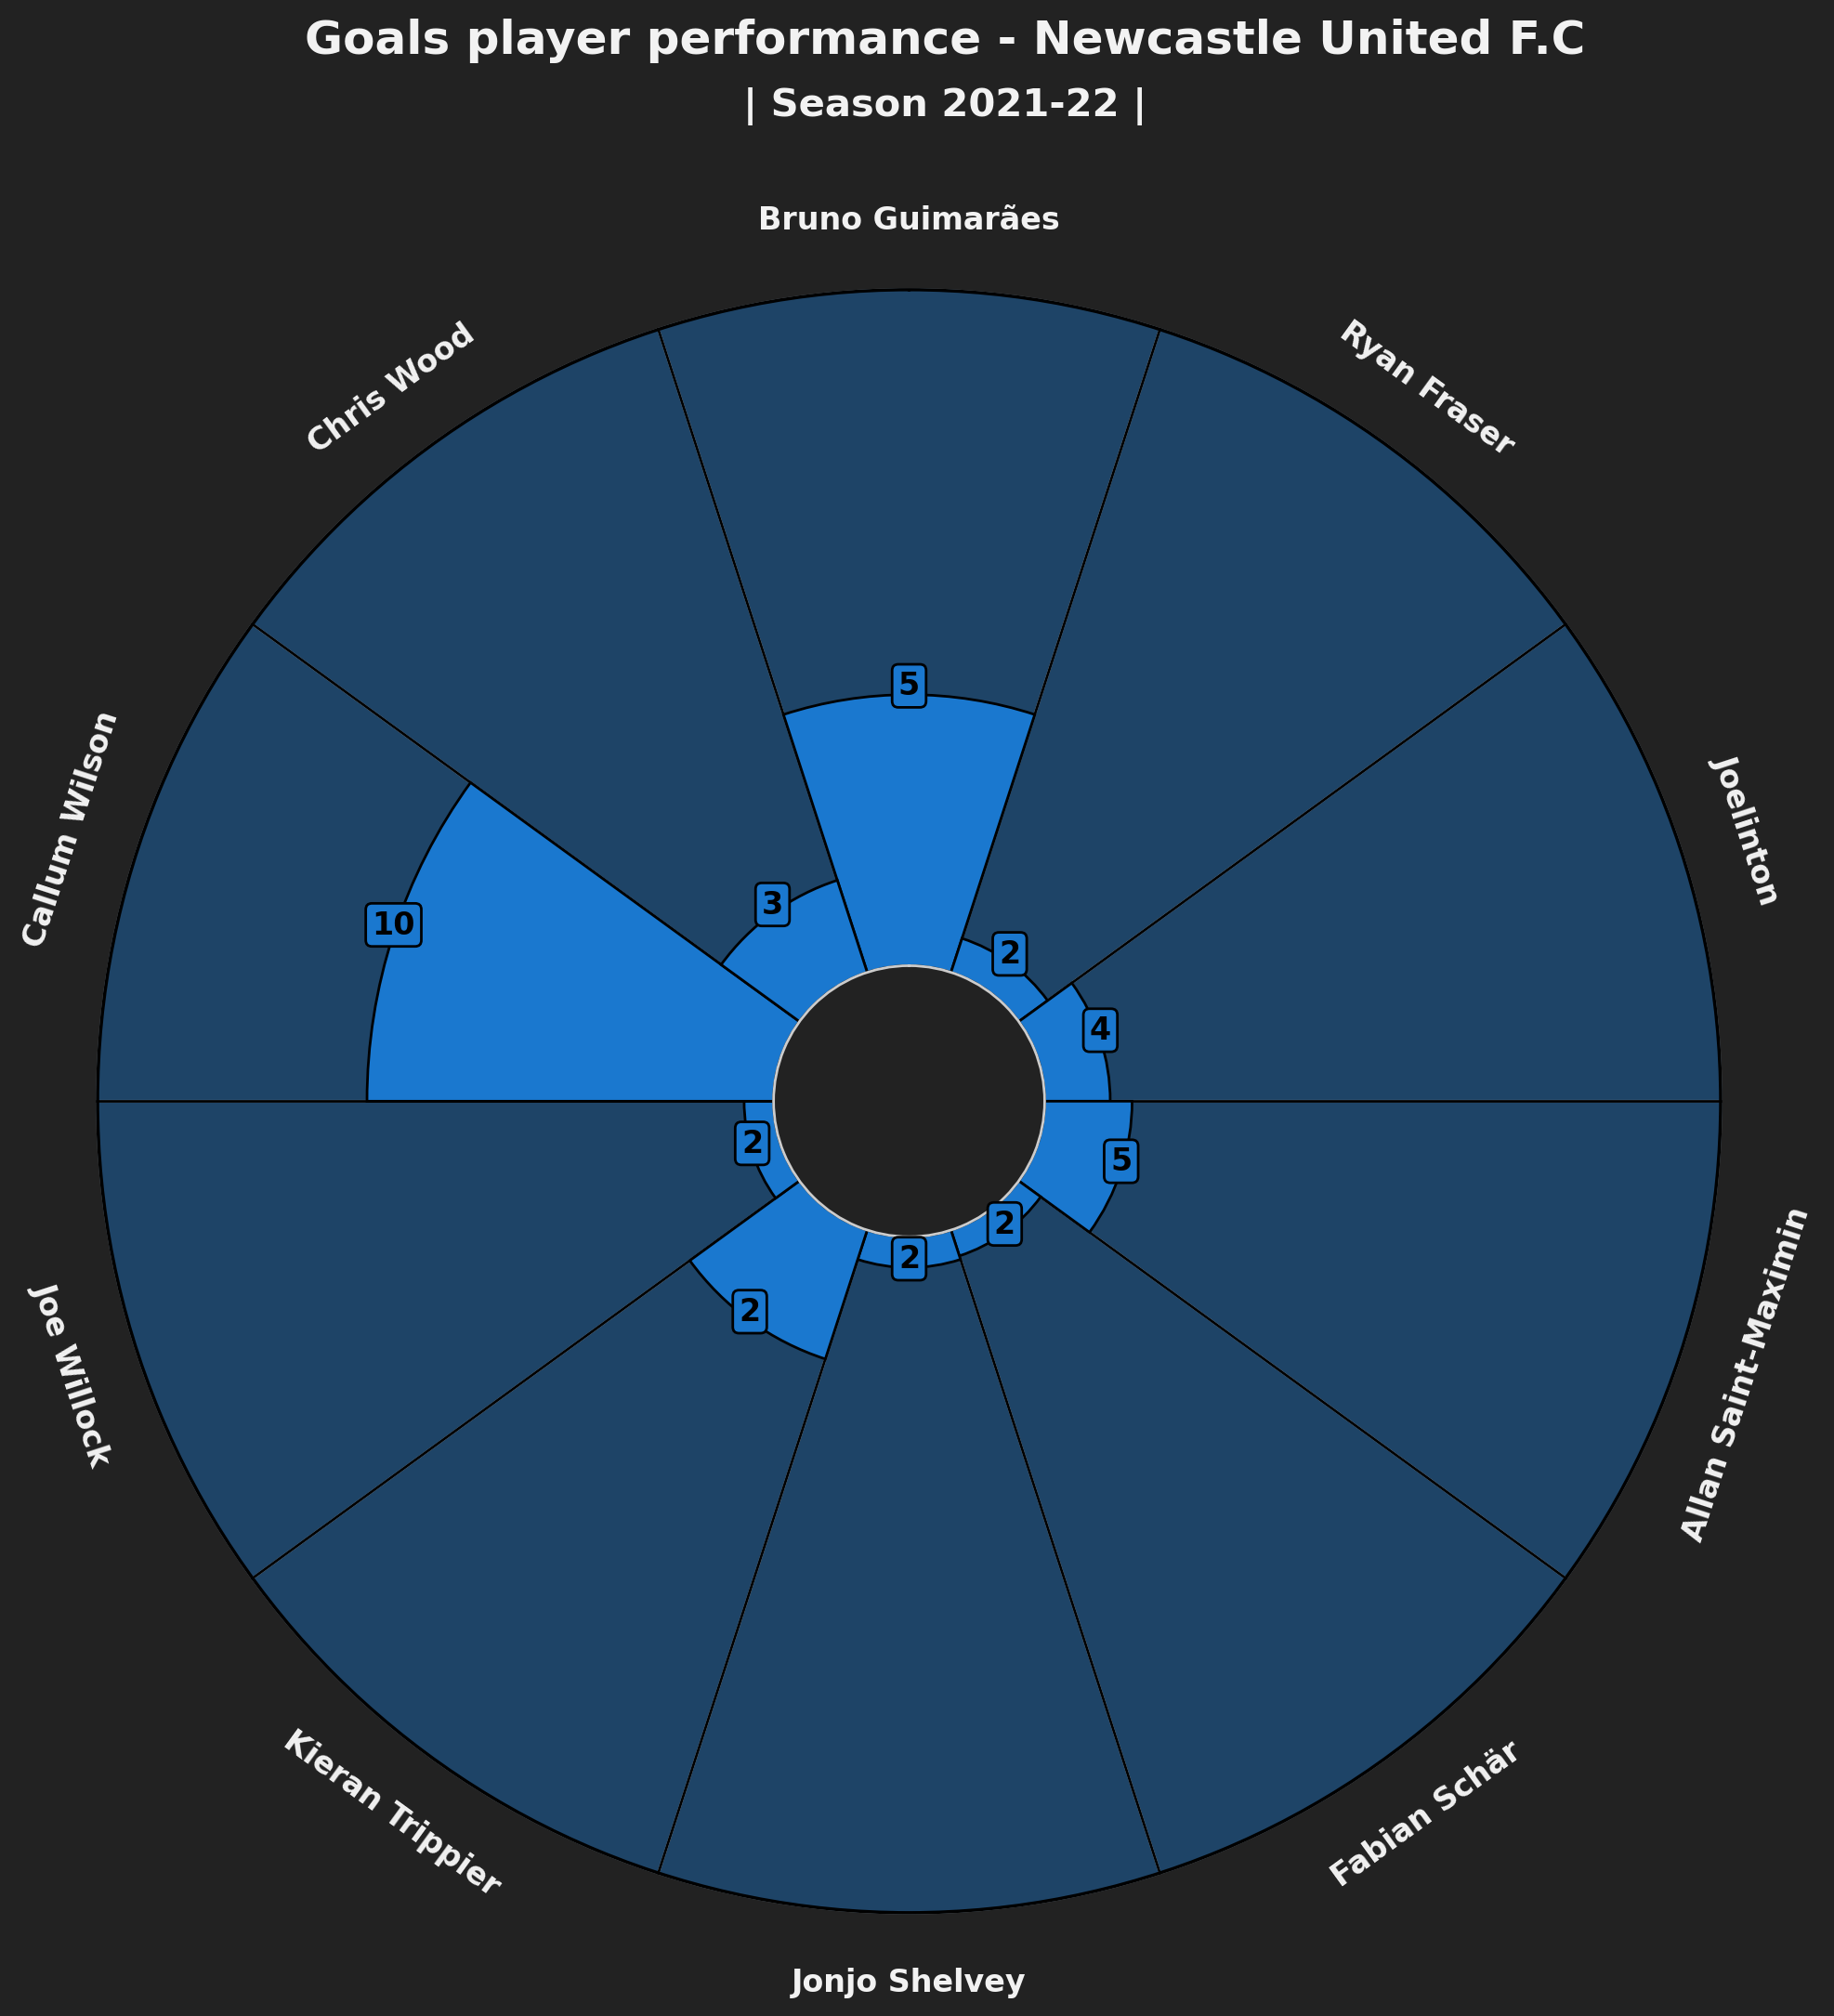

In [53]:
# players and goals list
# The goals is for all competition
players = players_goals.Player.tolist()
goals = players_goals.Goals+players_goals.Penalties

# minimum range value and maximum range value (1 appearance = 1 goal) 
min_range = [1 for _ in range(len(players))]
max_range = players_goals.Apearances.tolist()

# instantiate PyPizza class
baker = PyPizza(
    params=players,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=20,
)

# plot pizza
fig, ax = baker.make_pizza(
    goals.tolist(),                     # list of values
    figsize=(10, 12),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)


# add title
fig.text(
    0.515, 0.97, "Goals player performance - Newcastle United F.C", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "| Season 2021-22 |",
    size=15,ha="center", color="#F2F2F2")







plt.show()
